In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import  MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
# https://drive.google.com/file/d/1-KYKtc3RDhoKZT7YvlPWMP_4uLBfsYFn/view?usp=drivesdk
# df = pd.read_csv('/content/drive/MyDrive/mushrooms.csv')

id = "1-KYKtc3RDhoKZT7YvlPWMP_4uLBfsYFn"
download_url = f'https://drive.google.com/uc?id={id}'

df = pd.read_csv(download_url)

In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [ ]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


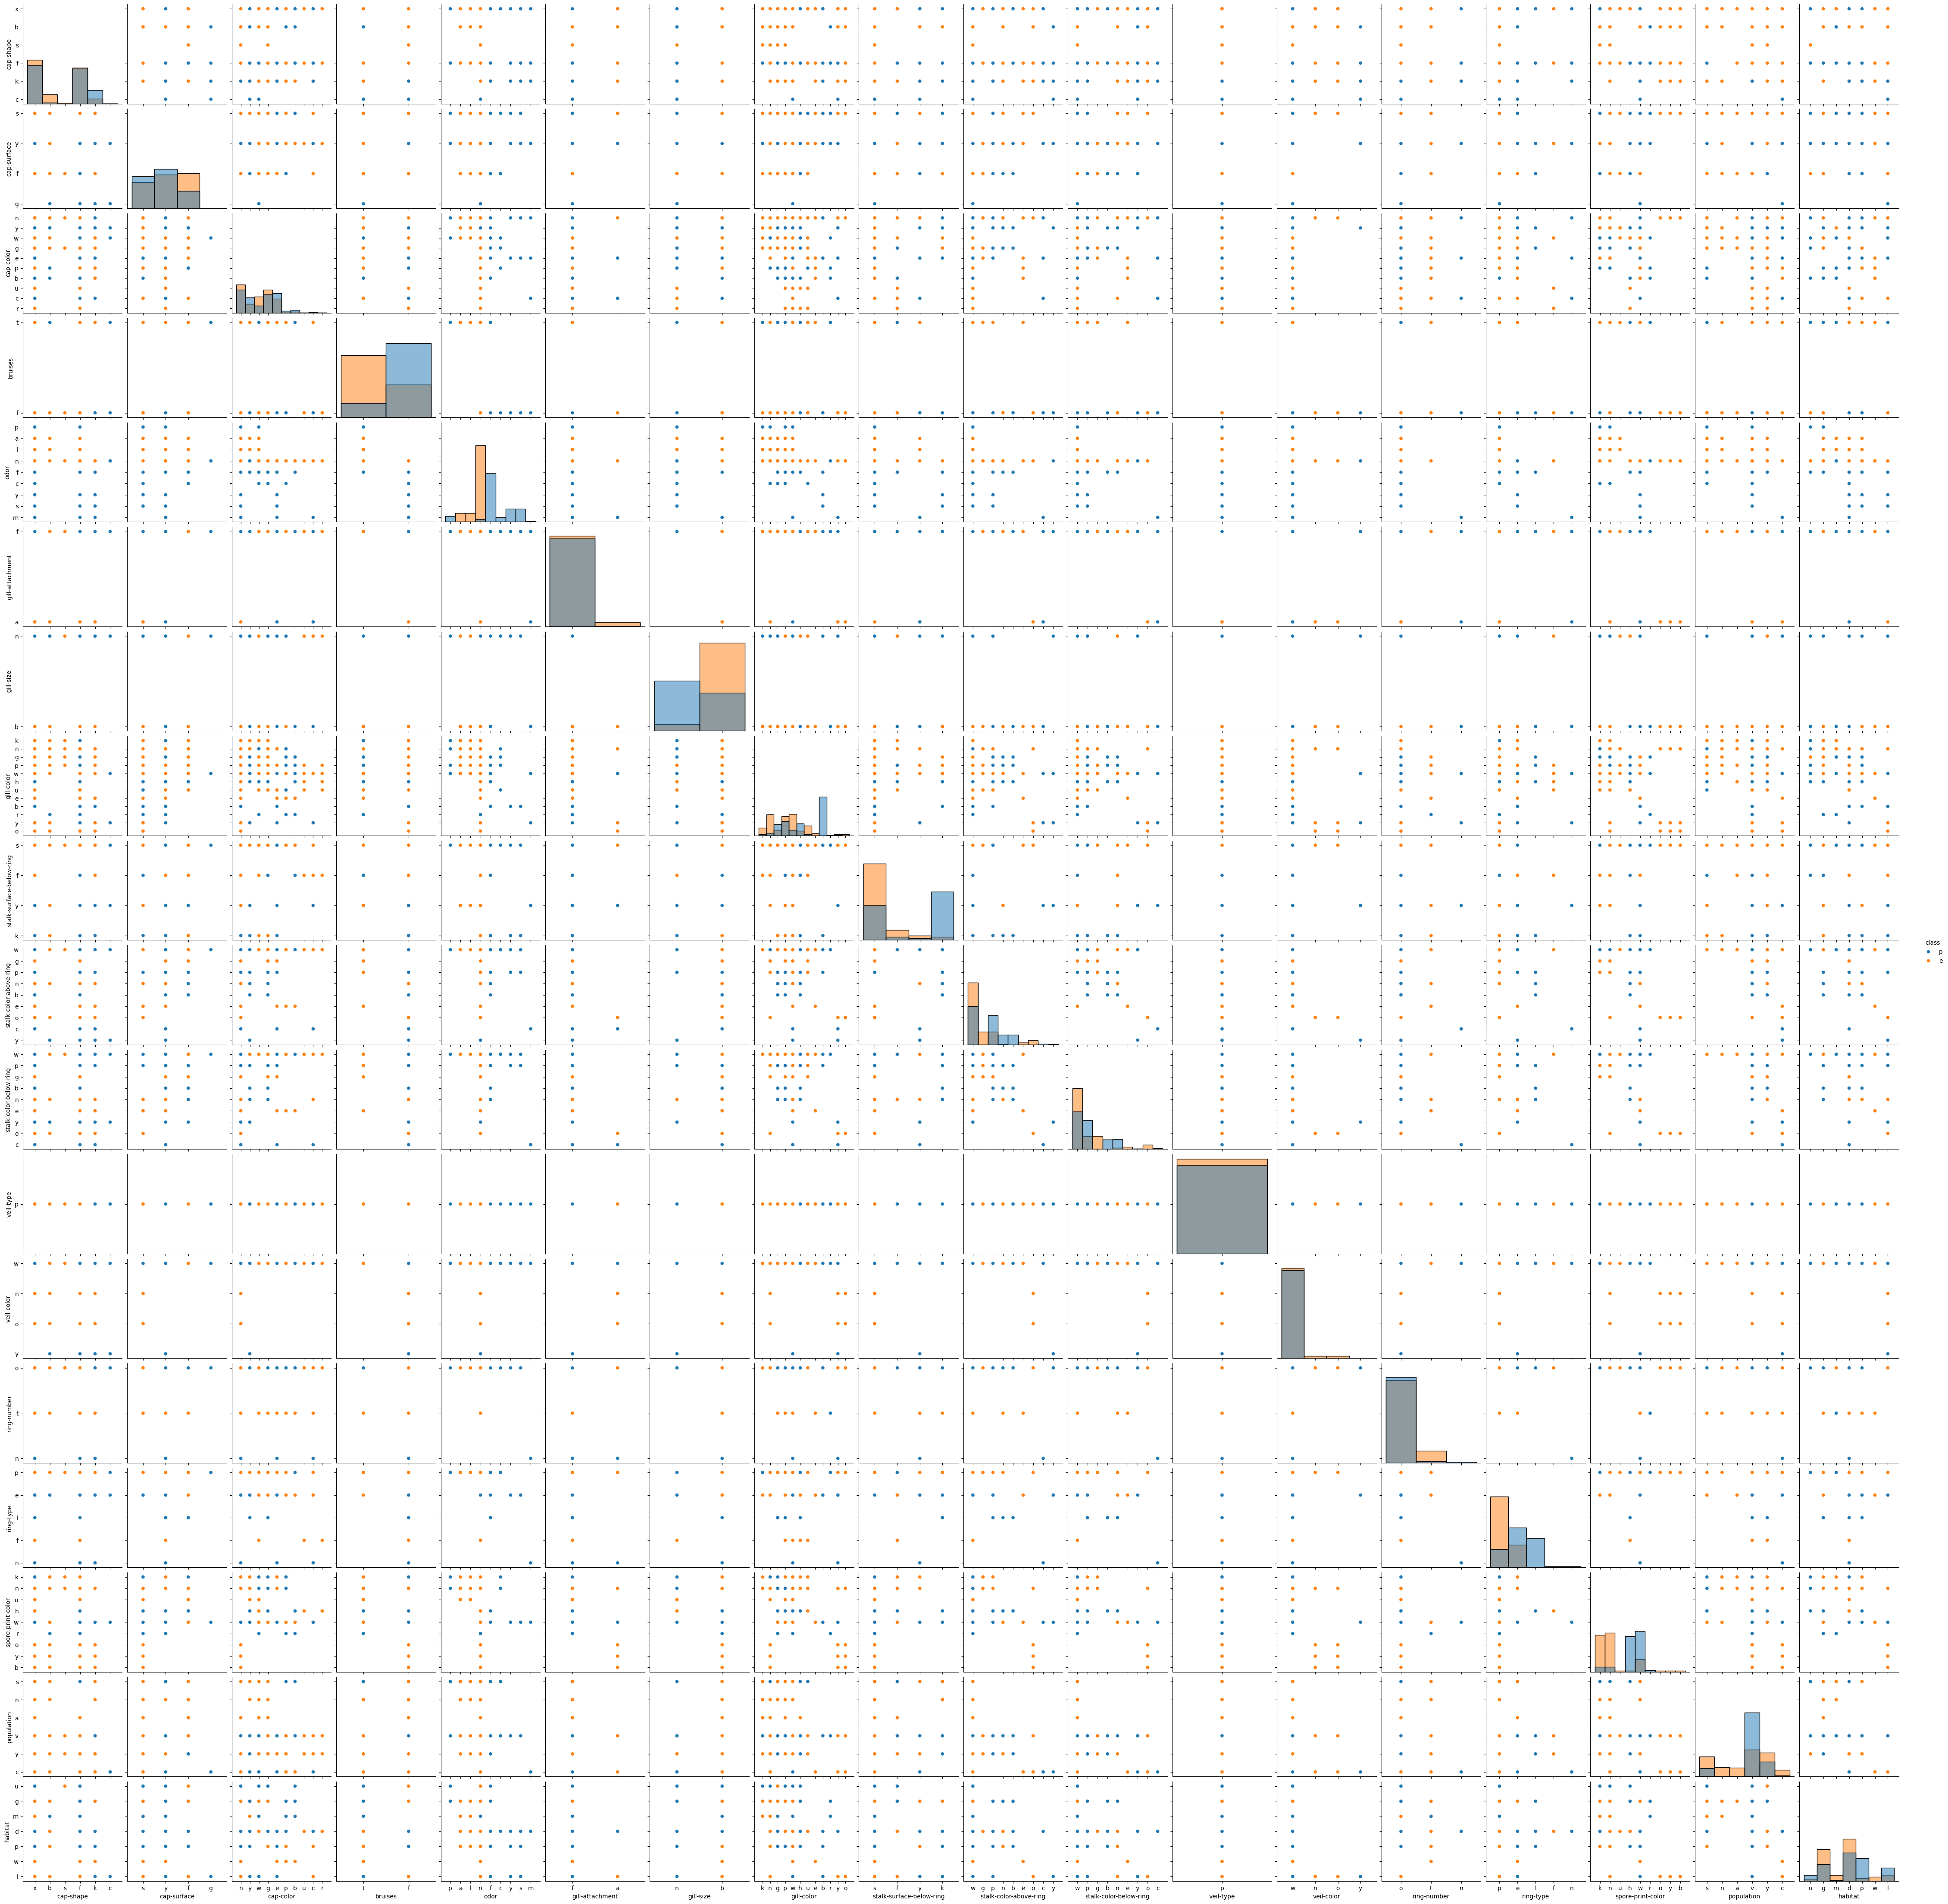

In [ ]:
sns.pairplot(df, hue='class', vars=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-size', 'gill-color', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'], diag_kind='hist')
plt.show()

In [ ]:
print("Dataset shape:", df.shape)

Dataset shape: (8124, 23)


In [ ]:
df['class'].unique()

array(['p', 'e'], dtype=object)

In [ ]:
df['class'].value_counts()

,count
class,
e,4208
p,3916


In [ ]:
one_hot_encoded_df = pd.get_dummies(df)
one_hot_encoded_df.head()


,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
1,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
one_hot_encoded_df.shape

(8124, 119)

In [ ]:
# add class colum of df to one_hot_enc_df
one_hot_encoded_df['class'] = df['class']
# drop class_e	class_p
one_hot_encoded_df.drop(['class_e', 'class_p'], axis=1, inplace=True)


In [ ]:
# replacing class column's p and e as 0 and 1
one_hot_encoded_df['class'] = one_hot_encoded_df['class'].replace({'p': 0, 'e': 1})
one_hot_encoded_df.head()

<ipython-input-6-48adf8ae6542>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  one_hot_encoded_df['class'] = one_hot_encoded_df['class'].replace({'p': 0, 'e': 1})


,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,class
0,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,True,False,0
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,1
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,1
3,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,True,False,0
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,1


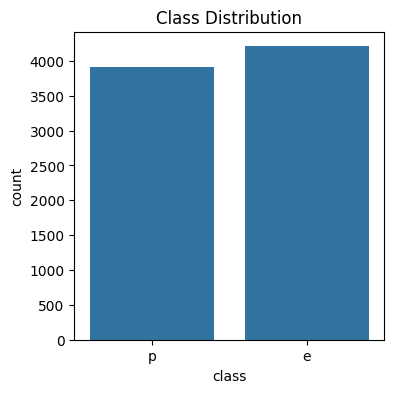

In [ ]:
# showing balanced data
plt.figure(figsize=(4, 4))
plt.title('Class Distribution')
sns.countplot(x = 'class', data = df)

plt.show()

In [ ]:
encoded_df = one_hot_encoded_df
X = encoded_df.drop('class', axis=1)
y = encoded_df['class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
X_test.shape

(1625, 117)

In [ ]:
# Min Max Scale before train in Neural Network
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
classifier=Sequential()
classifier.add(Dense(64,activation='relu',input_dim= X_train.shape[1]))
classifier.add(Dropout(0.4))
classifier.add(Dense(32,activation='relu'))
classifier.add(Dropout(0.3))
classifier.add(Dense(2,activation='softmax'))
classifier.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
classifier.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           7,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              66 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,701 (37.89 KB)

 Trainable params: 9,701 (37.89 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = classifier.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), verbose=1)

Epoch 1/15
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4662 - loss: 0.7009 - val_accuracy: 0.6302 - val_loss: 0.6845
Epoch 2/15
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5817 - loss: 0.6817 - val_accuracy: 0.7495 - val_loss: 0.6614
Epoch 3/15
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6763 - loss: 0.6633 - val_accuracy: 0.8997 - val_loss: 0.6202
Epoch 4/15
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7998 - loss: 0.6202 - val_accuracy: 0.9317 - val_loss: 0.5452
Epoch 5/15
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8600 - loss: 0.5543 - val_accuracy: 0.9305 - val_loss: 0.4579
Epoch 6/15
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8995 - loss: 0.4761 - val_accuracy: 0.9563 - val_loss: 0.3809
Epoch 7/15
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9230 - loss: 0.4103 - val_accuracy: 0.9717 - val_loss: 0.3178
Epoch 8/15
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9354 - loss: 0.3550 - val_accuracy: 0.

In [ ]:
loss, accuracy = classifier.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))
print('Loss: %.2f' % (loss*100))

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9922 - loss: 0.1229
Accuracy: 99.14
Loss: 12.38


In [ ]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

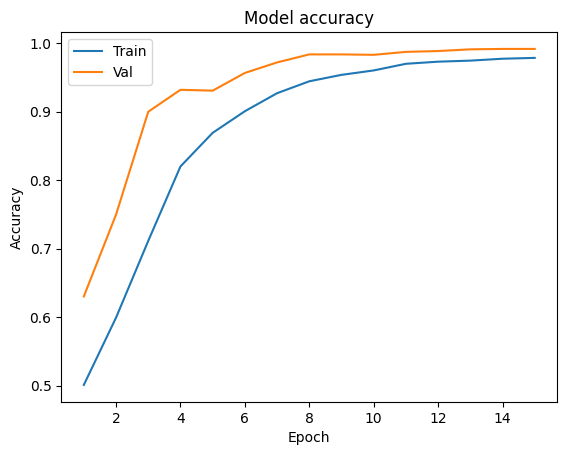

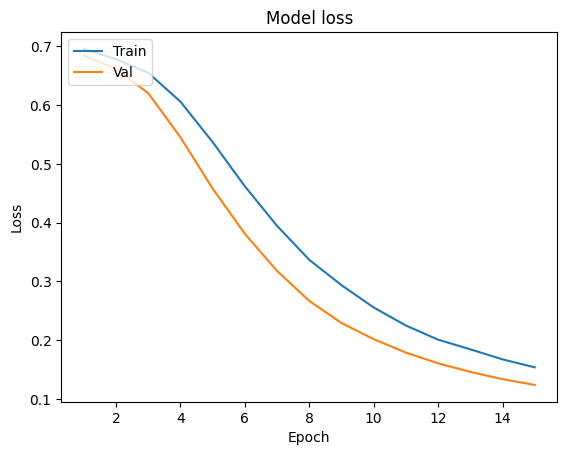

In [ ]:
plot_learningCurve(history, 15)

In [ ]:
y_pred=classifier.predict(X_test)
y_pred=y_pred>0.5
y_pred_int = y_pred.astype(int)
y_pred_int[:10]

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0]])

In [ ]:
#  confussion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_int)
cm


array([[759,  14],
       [  0, 852]])

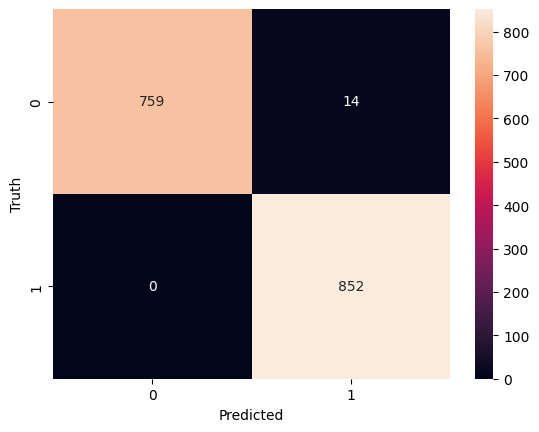

In [ ]:
# confussion matrix plot
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
# ROC and f1-score
from sklearn.metrics import roc_curve, auc, f1_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
f1 = f1_score(y_test, y_pred_int)
print('F1 Score:', f1)


F1 Score: 0.9918509895227008


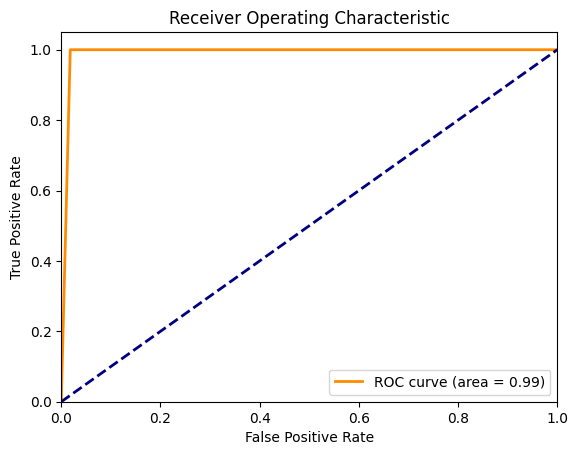

AUC: 0.9909443725743855


In [ ]:
# ROC, AUC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# AUC
print('AUC:', roc_auc)

In [ ]:

!pip install scikeras

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=117))
    model.add(Dropout(0.4))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    # Changed to a single output neuron with sigmoid activation for binary classification
    model.add(Dense(1, activation='sigmoid'))
    # Changed loss to binary_crossentropy for binary classification
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)

param_grid = {
    'batch_size': [32, 64],
    'epochs': [10, 20],
    'optimizer': ['adam', 'sgd']
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using 

Best: 1.000000 using {'batch_size': 32, 'epochs': 10, 'optimizer': 'adam'}


In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=117))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8618 - loss: 0.3564 - val_accuracy: 0.9982 - val_loss: 0.0147
Epoch 2/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9923 - loss: 0.0281 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 3/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9986 - loss: 0.0076 - val_accuracy: 1.0000 - val_loss: 4.9868e-04
Epoch 4/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9985 - loss: 0.0047 - val_accuracy: 1.0000 - val_loss: 2.6106e-04
Epoch 5/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9994 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 1.5216e-04
Epoch 6/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9999 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 8.7544e-05
Epoch 7/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9994 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 4.8648e-05
Epoch 8/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9994 - loss: 0.0015 - val_acc

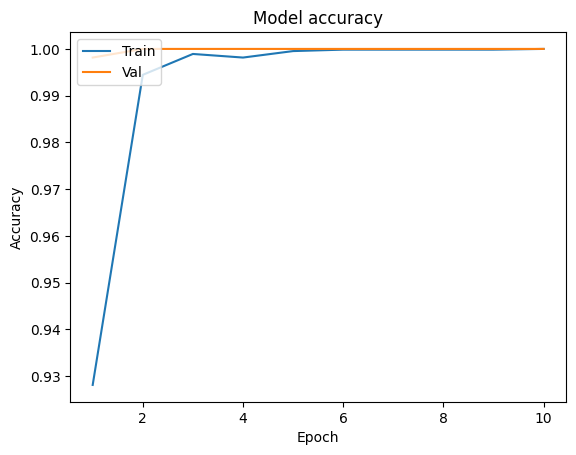

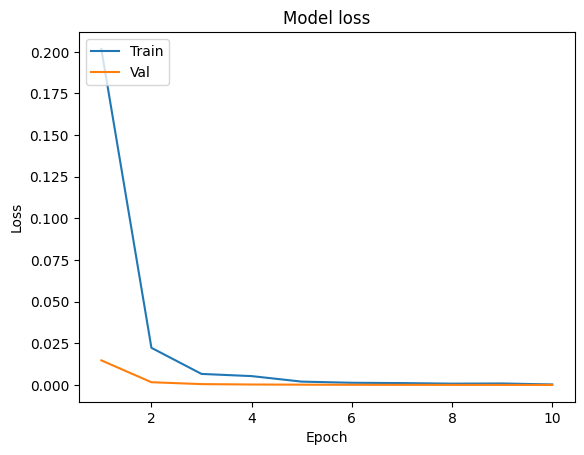

In [ ]:
plot_learningCurve(history, 10)

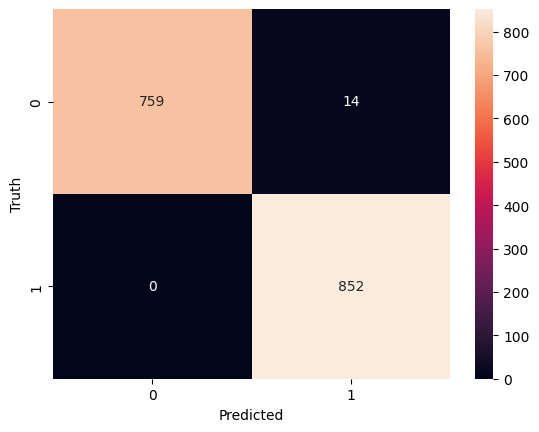

In [ ]:
cm=confusion_matrix(y_test,y_pred_int)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

F1 Score: 0.9918509895227008


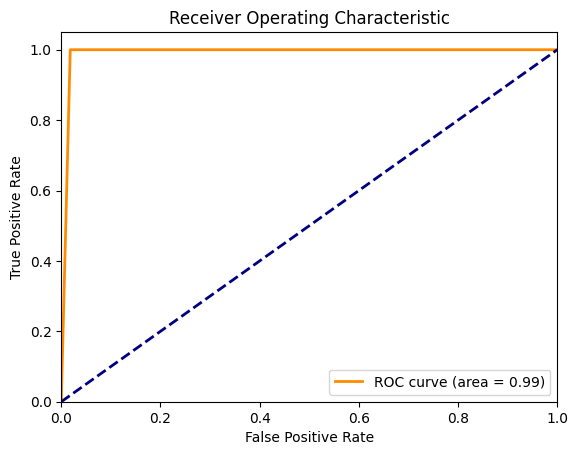

AUC: 0.9909443725743855


In [ ]:
# ROC and f1-score
from sklearn.metrics import roc_curve, auc, f1_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
f1 = f1_score(y_test, y_pred_int)
print('F1 Score:', f1)
# ROC, AUC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# AUC
print('AUC:', roc_auc)

#Trying Classical Machine Learning algorithms

In [ ]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

def EvaluateResult(X_test, y_test, model_name):
    y_pred = model_name.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)

    y_prob = model_name.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    train_error = 1 - model_name.score(X_train, y_train)
    test_error = 1 - model_name.score(X_test, y_test)

    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[0])
    axes[0].set_title('Confusion Matrix')
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('Actual')

    axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[1].set_xlim([0.0, 1.0])
    axes[1].set_ylim([0.0, 1.05])
    axes[1].set_title('Receiver Operating Characteristic')
    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')
    axes[1].legend(loc="lower right")

    axes[2].plot([0, 1], [train_error, train_error], label="Train Error")
    axes[2].plot([0, 1], [test_error, test_error], label="Test Error")
    axes[2].set_title("Train/Test Error Curves")
    axes[2].set_xlabel("Model Complexity")
    axes[2].set_ylabel("Error")
    axes[2].legend()

    plt.tight_layout()
    plt.show()

In [ ]:
# training xgboosts, Knn, Logistic regration and Randomforest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       773
           1       1.00      1.00      1.00       852

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



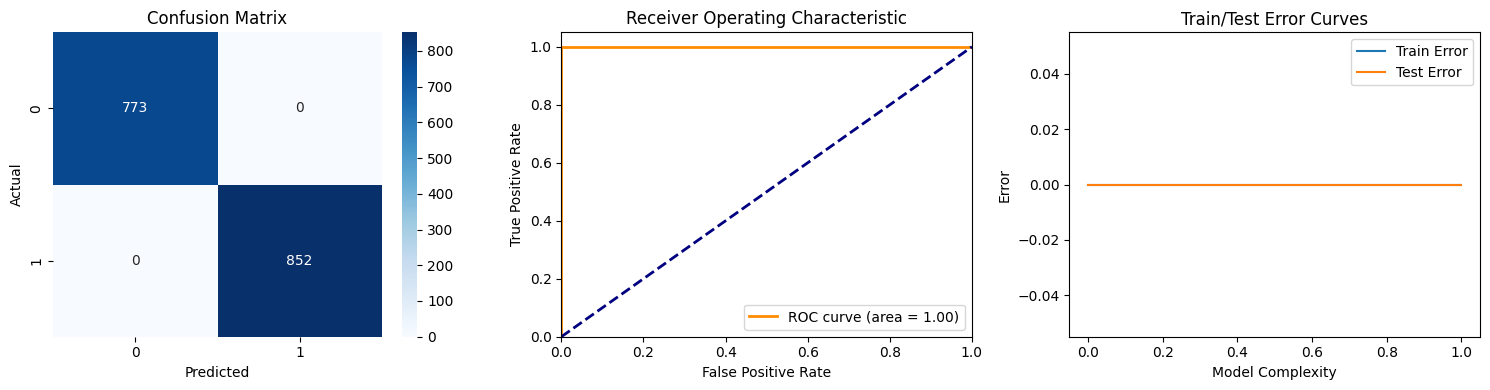

In [ ]:
EvaluateResult(X_test, y_test, knn)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       773
           1       1.00      1.00      1.00       852

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



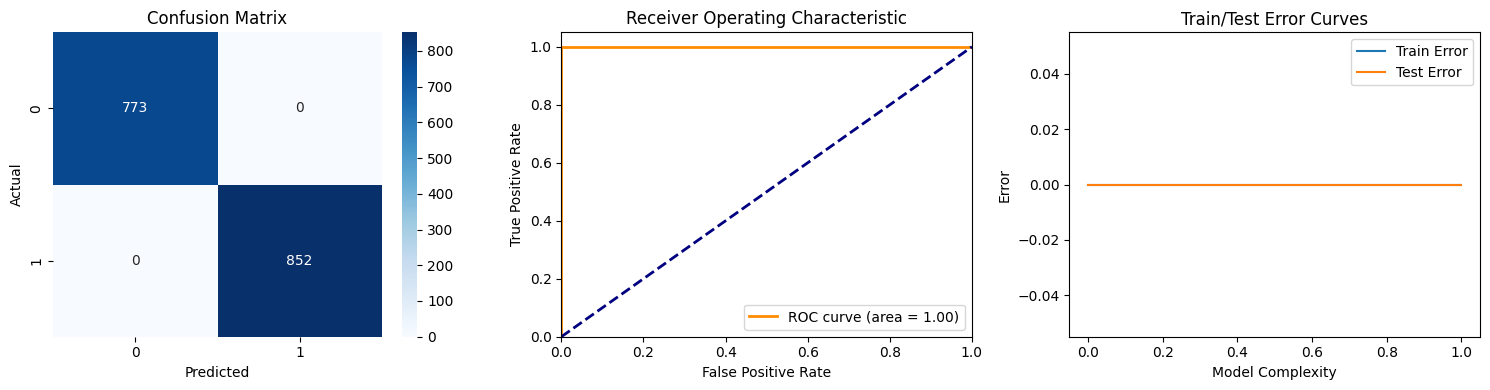

In [ ]:
EvaluateResult(X_test, y_test, lr)

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       773
           1       1.00      1.00      1.00       852

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



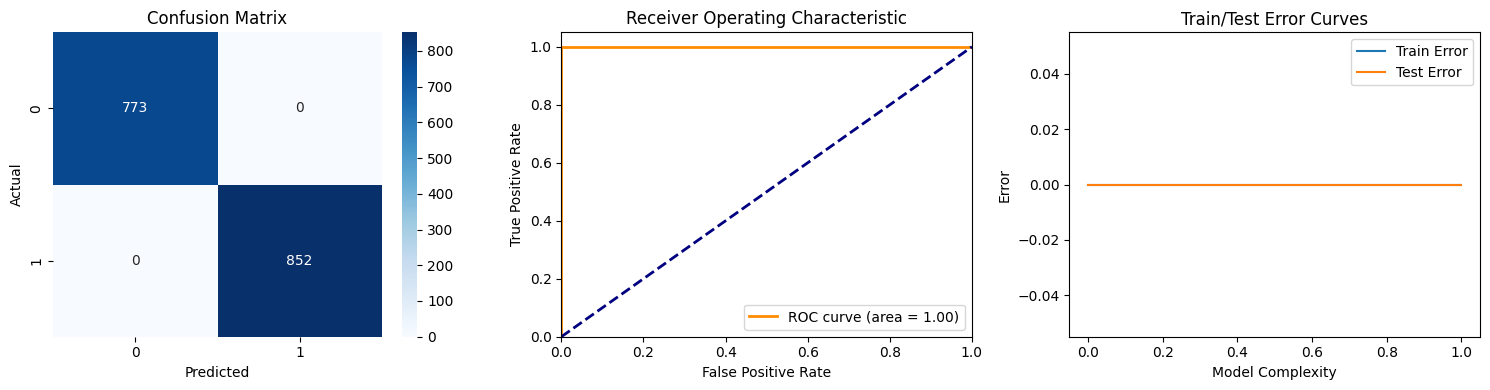

In [ ]:
EvaluateResult(X_test, y_test, xgb)

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       773
           1       1.00      1.00      1.00       852

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



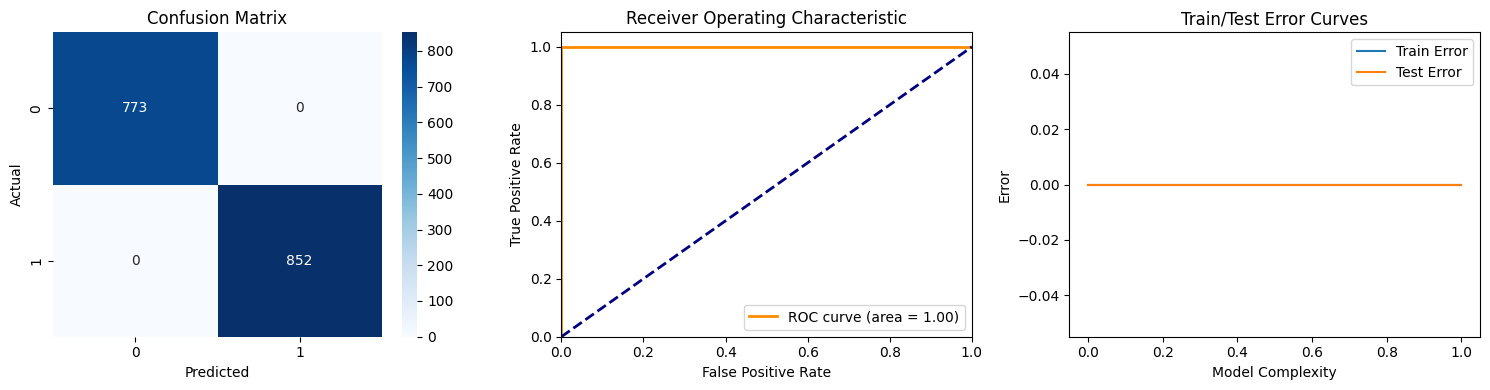

In [ ]:
EvaluateResult(X_test, y_test, random_forest)

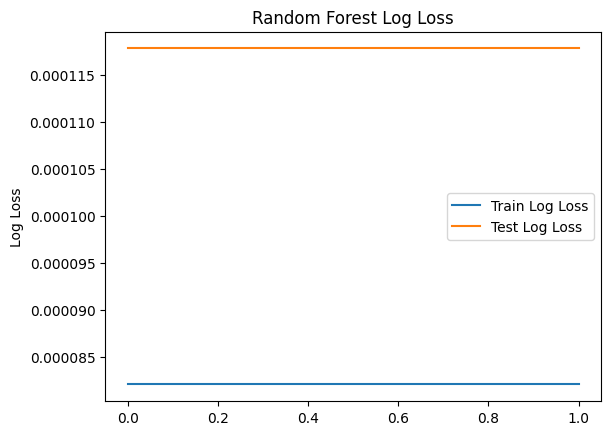

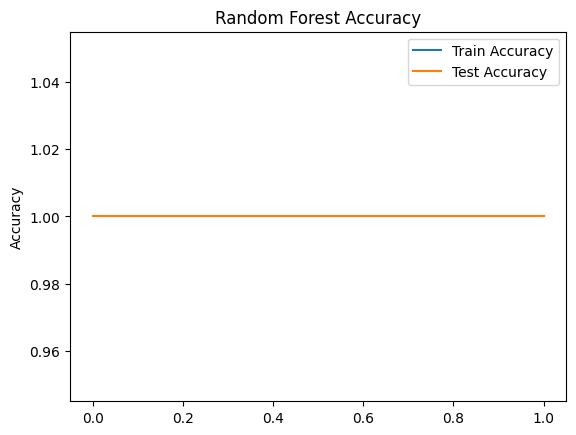

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Fit the model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Predict probabilities and classes
y_pred_rf = random_forest.predict(X_test)
y_pred_rf_proba = random_forest.predict_proba(X_test)

# Log Loss for Train and Test
train_log_loss = log_loss(y_train, random_forest.predict_proba(X_train))
test_log_loss = log_loss(y_test, y_pred_rf_proba)

# Accuracy for Train and Test
train_accuracy = accuracy_score(y_train, random_forest.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred_rf)

# Log Loss Plot
fig, ax = plt.subplots()
ax.plot([0, 1], [train_log_loss, train_log_loss], label='Train Log Loss')
ax.plot([0, 1], [test_log_loss, test_log_loss], label='Test Log Loss')
ax.legend()
plt.ylabel('Log Loss')
plt.title('Random Forest Log Loss')
plt.show()

# Accuracy Plot
fig, ax = plt.subplots()
ax.plot([0, 1], [train_accuracy, train_accuracy], label='Train Accuracy')
ax.plot([0, 1], [test_accuracy, test_accuracy], label='Test Accuracy')
ax.legend()
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy')
plt.show()


F1 Score: 1.0


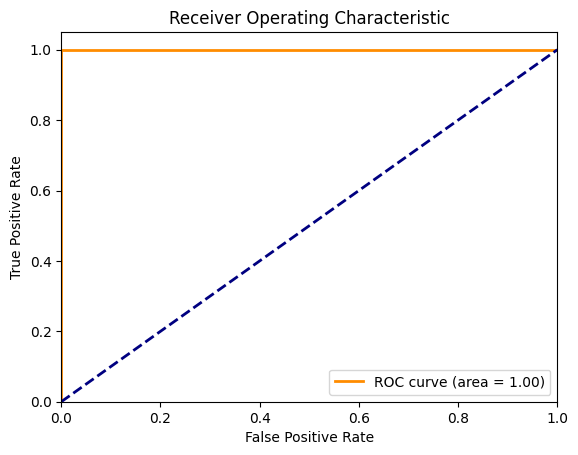

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
f1 = f1_score(y_test, y_pred)
print('F1 Score:', f1)


fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic')
ax.legend(loc="lower right")


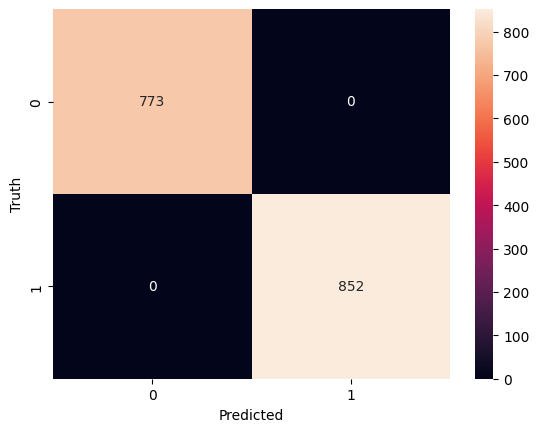

In [ ]:
cm=confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(random_forest, X, y, cv=kfold, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0
Standard Deviation: 0.0


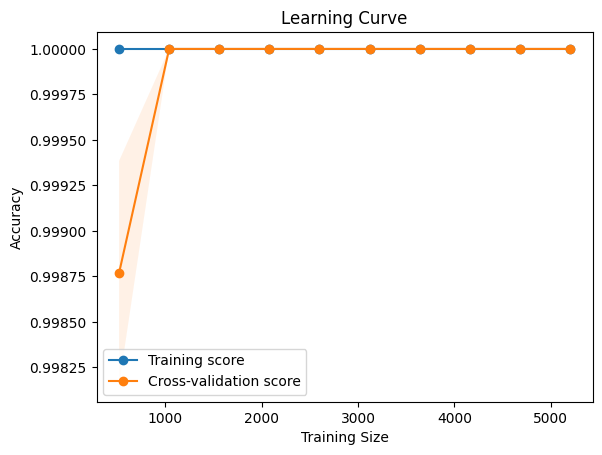

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    random_forest, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot
fig, ax = plt.subplots()
ax.plot(train_sizes, train_mean, 'o-', label='Training score')
ax.plot(train_sizes, test_mean, 'o-', label='Cross-validation score')
ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
ax.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
ax.legend()
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.show()
